In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import requests
import json
from geopy.distance import geodesic


final_hdb_resale_prices = pd.read_csv("hdb_model_data.csv")

In [2]:
#https://royleekiat.com/2020/10/22/how-to-predict-hdb-resale-prices-using-3-different-machine-learning-models-linear-regression-neural-networks-k-nearest-neighbours/

In [3]:
final_hdb_resale_prices.tail()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
77829,0.1250,0.494792,1.0,1.0,0.401826,0.318357,0.669844,0.0,0.299814
77830,0.1250,0.473958,1.0,1.0,0.380518,0.174104,0.652553,0.0,0.277843
77831,0.1250,0.473958,1.0,1.0,0.380518,0.174104,0.652553,0.0,0.271717
77832,0.1875,0.494792,1.0,1.0,0.383562,0.149878,0.653120,0.0,0.269248
77833,0.0625,0.473958,1.0,1.0,0.383562,0.149878,0.653120,0.0,0.254687


In [4]:
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, RidgeClassifier
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd



# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

C:\Users\almun\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\almun\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\almun\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#Linear Regression

In [7]:
features = ['storey_range','floor_area_sqm','no.of bto','resale application','remaining_lease_months','Distance to nearest MRT','Distance to CBD','isMatureEstate']
X = final_hdb_resale_prices[features]
y = final_hdb_resale_prices['cpi_adjusted_price_per_sqm']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [9]:
scaler = StandardScaler()

In [10]:
X_train.head()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate
30358,0.0625,0.208333,0.505255,0.0,0.292237,0.249092,0.646415,0.0
59440,0.1250,0.317708,1.000000,1.0,0.917808,0.323426,0.635754,0.0
71088,0.1250,0.265625,1.000000,1.0,0.558600,0.411830,0.540727,1.0
46493,0.0625,0.385417,0.505255,0.0,0.435312,0.284957,0.512958,1.0
77270,0.1250,0.510417,1.000000,1.0,0.474886,0.475596,0.422522,1.0


In [11]:
#Linear Regression Model

In [12]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [13]:
final_hdb_resale_prices

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
0,0.0625,0.114583,0.0,0.0,0.229833,0.242702,0.377101,1.0,0.113027
1,0.3750,0.098958,0.0,0.0,0.888889,0.181339,0.376605,1.0,0.339299
2,0.0000,0.114583,0.0,0.0,0.243531,0.153615,0.373691,1.0,0.077851
3,0.0625,0.114583,0.0,0.0,0.223744,0.212727,0.381423,1.0,0.128102
4,0.1250,0.088542,0.0,0.0,0.292237,0.247779,0.408523,1.0,0.084059
...,...,...,...,...,...,...,...,...,...
77829,0.1250,0.494792,1.0,1.0,0.401826,0.318357,0.669844,0.0,0.299814
77830,0.1250,0.473958,1.0,1.0,0.380518,0.174104,0.652553,0.0,0.277843
77831,0.1250,0.473958,1.0,1.0,0.380518,0.174104,0.652553,0.0,0.271717
77832,0.1875,0.494792,1.0,1.0,0.383562,0.149878,0.653120,0.0,0.269248


In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 

0.24163999721233856
[ 0.02654384 -0.00374109  0.03331021  0.01123241  0.06240164 -0.02138087
 -0.04679355  0.02037743]


In [15]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [16]:
df

,Actual,Predicted
75439,0.234830,0.233637
15416,0.117310,0.167460
24537,0.200839,0.181030
33177,0.189699,0.206968
49716,0.107778,0.163280
...,...,...
7492,0.175317,0.140181
11899,0.084642,0.029042
27046,0.208925,0.257274
56055,0.398285,0.353926


In [17]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.03754852888299216
MSE: 0.002365485598986476
RMSE: 0.048636258069330085
VarScore: 0.7976958275092356


In [18]:
print("Coefficient of determination test(R2): %.2f" % metrics.r2_score(y_test, y_pred).round(2))

Coefficient of determination test(R2): 0.80


In [19]:
#Model 2: K Nearest Neighbours

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

In [21]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute')

In [22]:
predictions = knn.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mse ** (1/2)
print(rmse)

0.032135420537029336


In [24]:
print("Coefficient of determination test(R2): %.2f" % metrics.r2_score(y_test, predictions).round(2))

Coefficient of determination test(R2): 0.91


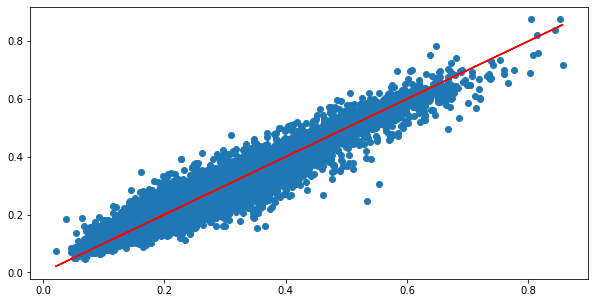

In [25]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1 = df.head(20)
df1

,Actual,Predicted
75439,0.234830,0.236817
15416,0.117310,0.158444
24537,0.200839,0.181818
33177,0.189699,0.180034
49716,0.107778,0.151504
770,0.109540,0.129555
26407,0.182963,0.175871
701,0.277325,0.303783
55778,0.205526,0.206458
35288,0.156143,0.127861


In [27]:
#KNN finding K manually

In [28]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.03525320116437958
RMSE value for k=  2 is: 0.03250545502722273
RMSE value for k=  3 is: 0.032051231449418405
RMSE value for k=  4 is: 0.03193585039550359
RMSE value for k=  5 is: 0.03213372038809706
RMSE value for k=  6 is: 0.032256053029728816
RMSE value for k=  7 is: 0.032431663402039665
RMSE value for k=  8 is: 0.032613406064672376
RMSE value for k=  9 is: 0.03281067439819852
RMSE value for k=  10 is: 0.03298375063223479
RMSE value for k=  11 is: 0.03313261866183574
RMSE value for k=  12 is: 0.033247587911491155
RMSE value for k=  13 is: 0.033349139686331145
RMSE value for k=  14 is: 0.03349925353329721
RMSE value for k=  15 is: 0.03361346814029385
RMSE value for k=  16 is: 0.03375833405315666
RMSE value for k=  17 is: 0.033881507120625286
RMSE value for k=  18 is: 0.03399387032153918
RMSE value for k=  19 is: 0.034076679111710285
RMSE value for k=  20 is: 0.034159860167279864


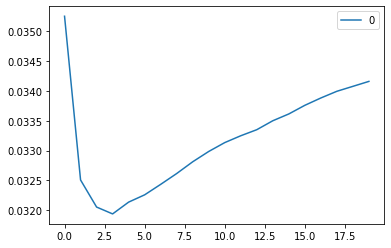

In [29]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [31]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 5}

In [34]:
pred=model.predict(X_test)
print("Coefficient of determination test(R2): %.2f" % metrics.r2_score(y_test, pred).round(2))

Coefficient of determination test(R2): 0.91
